In [1]:
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

/tmp/ipykernel_99739/2717053250.py:79: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


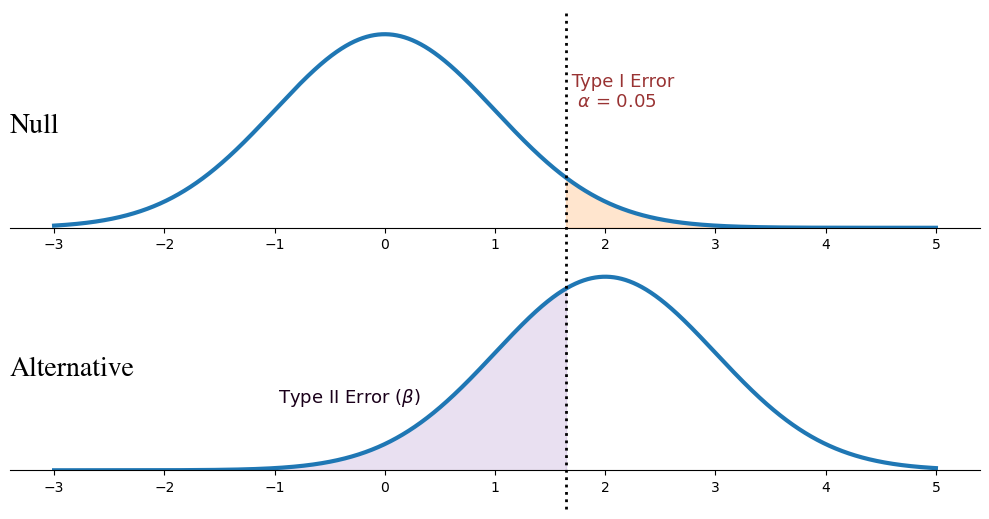

In [2]:
alpha = 0.05
key = 0

x = np.linspace(-3,5, 100_000)


# Make empty figure
fig, axx = plt.subplots(2, 1, 
                        figsize = (20,5),
                        sharey = True,
                        sharex = True)
plt.close()
del fig
del axx 

fig = plt.figure(figsize = (10,5))
ax0 = fig.add_subplot(211, zorder = 99)
ax1 = fig.add_subplot(212)

#ax0.set_title("Null", loc = 'left')

ax0.text(0, 0.5,
        s= 'Null',
        ha = 'left',
        va = 'center',
        size = 20,
         font = 'times',
        transform = ax0.transAxes)

ax1.text(0, 0.5,
        s= 'Alternative',
        ha = 'left',
        va = 'center',
        size = 20,
         font = 'times',
        transform = ax1.transAxes)


for center, ax in zip([0, 2], [ax0, ax1]):
    # add normal curve
    norm_pdf = stats.norm.pdf(x, center, 1)

    ax.plot(x, norm_pdf, lw = 3)

    # add z stat

    # Clean plot
    for s in 'left', 'right', 'top':
        ax.spines[s].set_visible(False)
        ax.yaxis.set_ticks([])
        ax.set_ylim(0,.42)


# draw rejection region
ax = ax0
#alpha = .05
critical_value = stats.norm.ppf(1 - alpha) # for one-sided
rejection_x = x[x>critical_value]
ax.fill_between(rejection_x, stats.norm.pdf(x, 0, 1)[-len(rejection_x):], color = 'C1', alpha = 0.2)
ax.text(critical_value, .25, 
        s = ' Type I Error\n  ' + r'$\alpha$ = ' + f'{alpha:.2f}', fontsize = 13, color = (.6, .2, .2)) 

# Draw critical value line through both plots
trans = transforms.blended_transform_factory(ax.transData, fig.transFigure)
ax.plot([critical_value, critical_value], [0, 1], color='black', linestyle = 'dotted',
                    lw=2, transform = trans, clip_on= False, zorder = 99)

# Draw type II error region 
fail_to_reject_region = x[x <= critical_value]
ax1.fill_between(fail_to_reject_region, stats.norm.pdf(x, 2, 1)[0:len(fail_to_reject_region)], color = 'C4', alpha = 0.2)
ax1.text(1.645 - 1.3, .14,
         s = r'Type II Error ($\beta$) ', fontsize = 13, color = (.1, .0, .1), ha = 'right') 



fig.tight_layout()
#fig.savefig(f"animate_powerstacked{key}.pdf")
plt.savefig("../book/images/typeIandII.svg", transparent = True)
fig.show()

/tmp/ipykernel_99739/2317640221.py:106: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


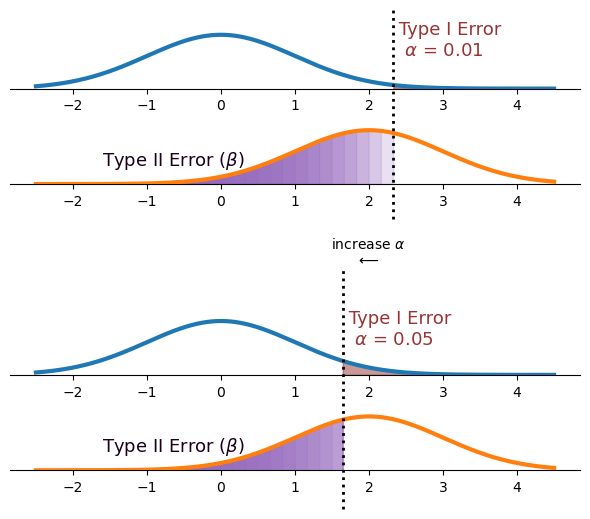

In [3]:
#for key, alpha in enumerate([.01, .05, .1]):
key = 0
alpha = 0.01

x = np.linspace(-2.5,4.5, 100_000)

fig = plt.figure(figsize = (6,5))
gs = gridspec.GridSpec(5, 1, height_ratios=[1, 1, 1, 1, 1])  # Increase third entry for more space before ax2

if False:
    ax0 = fig.add_subplot(411, zorder = 99)
    ax1 = fig.add_subplot(412)
    ax2 = fig.add_subplot(413, zorder = 100)
    ax3 = fig.add_subplot(414)
ax0 = fig.add_subplot(gs[0], zorder=99)
ax1 = fig.add_subplot(gs[1])
ax_space = fig.add_subplot(gs[2])
ax2 = fig.add_subplot(gs[3], zorder=100)
ax3 = fig.add_subplot(gs[4])


for center, col, ax in zip([0, 2, 0, 2], [0,1,0,1], [ax0, ax1, ax2, ax3]):
    # add normal curve
    norm_pdf = stats.norm.pdf(x, center, 1)

    ax.plot(x, norm_pdf, lw = 3, color=f"C{col:g}", zorder = 3)

    # add z stat

    # Clean plot
    for s in 'left', 'right', 'top':
        ax.spines[s].set_visible(False)
        ax.yaxis.set_ticks([])
        ax.set_ylim(0,.42)


# draw rejection region
ax = ax0
#alpha = .05
critical_value = stats.norm.ppf(1 - alpha) # for one-sided
rejection_x = x[x>critical_value]
ax.fill_between(rejection_x, stats.norm.pdf(x, 0, 1)[-len(rejection_x):], color = (.6, .2, .2), alpha = 0.5)
ax.text(critical_value, .25, 
        s = ' Type I Error\n  ' + r'$\alpha$ = ' + f'{alpha:.2f}', fontsize = 13, color = (.6, .2, .2)) 

# Draw critical value line through both plots
trans = transforms.blended_transform_factory(ax.transData, fig.transFigure)
ax.plot([critical_value, critical_value], [.58, 1], color='black', linestyle = 'dotted',
                    lw=2, transform = trans, clip_on= False, zorder = 99)

# Draw type II error region 
fail_to_reject_region = x[x <= critical_value]
#ax1.fill_between(fail_to_reject_region, stats.norm.pdf(x, 2, 1)[0:len(fail_to_reject_region)], color = 'C4', alpha = 0.2)

for end in np.linspace(np.min(x), critical_value, 30):
    fail_region = x[x <= end]
    ax1.fill_between(fail_region, stats.norm.pdf(x,2,1)[0:len(fail_region)],
                    color = 'C4',
                    alpha = 0.2)

ax1.text(1.645 - 1.3, .14,
         s = r'Type II Error ($\beta$) ', fontsize = 13, color = (.1, .0, .1), ha = 'right') 


ax_space.set_xlim(ax0.get_xlim())
trans = transforms.blended_transform_factory(ax_space.transData, ax_space.transAxes)
ax_space.text(1.99, 0.5,
              s = r"increase $\alpha$" +'\n' + r"$\longleftarrow$" ,
              ha = 'center',
              va = 'center',
              transform = trans)
ax_space.axis('off')

# draw rejection region
ax = ax2
alpha = .05
critical_value = stats.norm.ppf(1 - alpha) # for one-sided
rejection_x = x[x>critical_value]
ax.fill_between(rejection_x, stats.norm.pdf(x, 0, 1)[-len(rejection_x):], color = (.6, .2, .2), alpha = 0.5)
ax.text(critical_value, .23, 
        s = ' Type I Error\n  ' + r'$\alpha$ = ' + f'{alpha:.2f}', fontsize = 13, color = (.6, .2, .2)) 

# Draw critical value line through both plots
trans = transforms.blended_transform_factory(ax.transData, fig.transFigure)
ax.plot([critical_value, critical_value], [0, .48], color='black', linestyle = 'dotted',
                    lw=2, transform = trans, clip_on= False, zorder = 99)

# Draw type II error region 
fail_to_reject_region = x[x <= critical_value]
#ax3.fill_between(fail_to_reject_region, stats.norm.pdf(x, 2, 1)[0:len(fail_to_reject_region)], color = 'C4', alpha = 0.2)

critical_value2 = stats.norm.ppf(1 - .01) # for one-sided
for end in np.linspace(np.min(x), critical_value2, 30):
    end = np.min([critical_value, end])
    fail_region = x[x <= end]
    ax3.fill_between(fail_region, stats.norm.pdf(x,2,1)[0:len(fail_region)],
                color = 'C4',
                alpha = 0.18)
    
ax3.text(1.645 - 1.3, .14,
         s = r'Type II Error ($\beta$) ', fontsize = 13, color = (.1, .0, .1), ha = 'right') 


fig.tight_layout()
fig.savefig("../book/images/power_stacked_vary_alpha.svg", transparent = True)
fig.show()
